In [68]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.close("all")
print(pd.__version__)

1.2.0


In [69]:
def load_loss(file:str)->pd.DataFrame:
    loss_log = pd.read_csv(file, header=None)
    cols = ["train_lr", "train_loss", "test_loss", "test_acc1", "test_acc5", 'epoch', "n_parameters"]
    loss_log = loss_log.set_axis(cols, axis='columns')

    for col in cols:
        if col == "n_parameters":
            loss_log[col] = loss_log[col].str.strip('}').str.split(':').apply(pd.Series).iloc[:,1].astype('int')
            # continue
        else:
            loss_log[col] = loss_log[col].str.split(':').apply(pd.Series).iloc[:,1].astype('float')
    return loss_log

def plot_loss(loss_log, figsize:tuple=(16,2), title:str=''):
    start = loss_log.query('epoch==0').index[-1]
    loss_log_ = loss_log.loc[start:].set_index('epoch')

    plt.figure( )

    ax = loss_log_[['train_lr', 'train_loss','test_loss']].plot(title=f'Loss : {title}', secondary_y=['train_lr'], figsize=figsize, grid=True, logy=False)
    ax.set_ylabel("Loss")
    ax.set_xlabel("epoch")
    ax.right_ax.set_ylabel("lr");

    plt.figure()
    ax = loss_log_[['train_lr', 'test_acc1', 'test_acc5']].plot(title=f'Accuracy : {title}', secondary_y=['train_lr'], figsize=figsize, grid=True, logy=False)
    ax.set_ylabel("Accuracy_top1")
    ax.set_xlabel("epoch")
    ax.right_ax.set_ylabel("lr");


### Linear Probing

<Figure size 432x288 with 0 Axes>

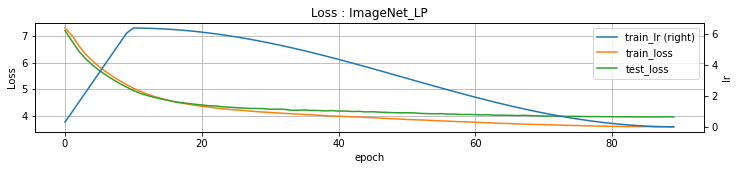

<Figure size 432x288 with 0 Axes>

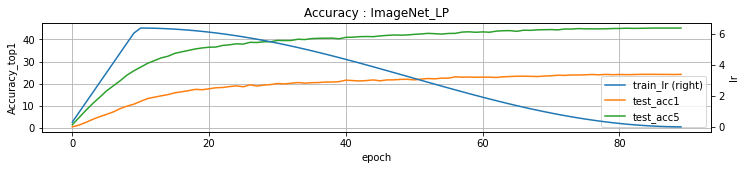

In [70]:
file = 'log_ImageNet_LP.txt'
loss_Img_LP = load_loss(file)
plot_loss(loss_Img_LP, figsize=(12,2), title='ImageNet_LP')

<Figure size 432x288 with 0 Axes>

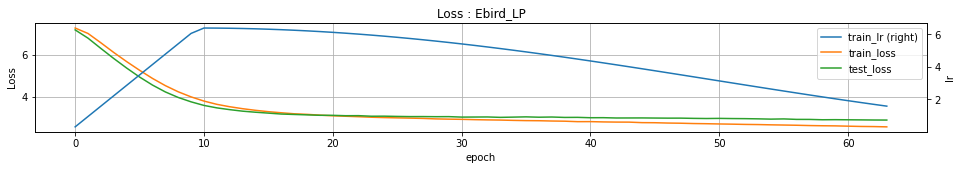

<Figure size 432x288 with 0 Axes>

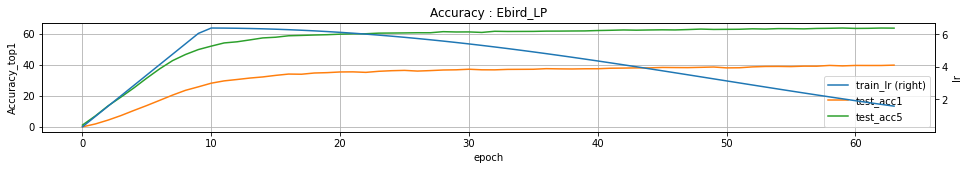

In [71]:
file = 'log_Ebird_LP.txt'
loss_Ebird_LP = load_loss(file)
plot_loss(loss_Ebird_LP, figsize=(16,2), title='Ebird_LP')

<Figure size 432x288 with 0 Axes>

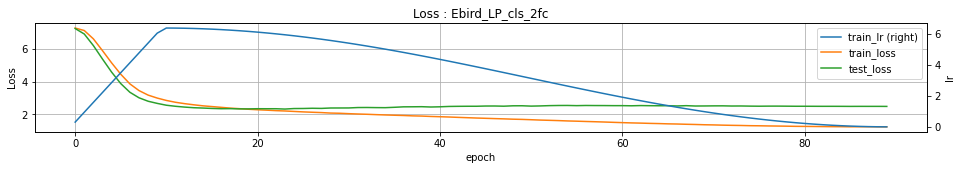

<Figure size 432x288 with 0 Axes>

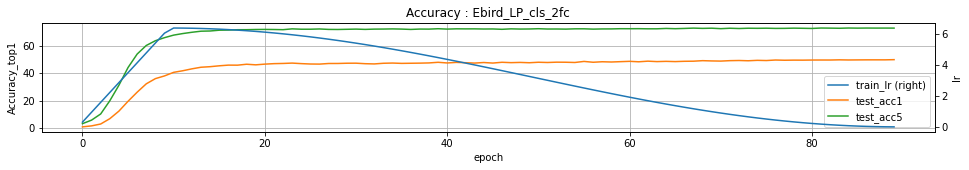

In [76]:
file = 'log_Ebird_LP_cls_2fc.txt'
loss_Ebird_LP_2fc = load_loss(file)
plot_loss(loss_Ebird_LP_2fc, figsize=(16,2), title='Ebird_LP_cls_2fc')

<Figure size 432x288 with 0 Axes>

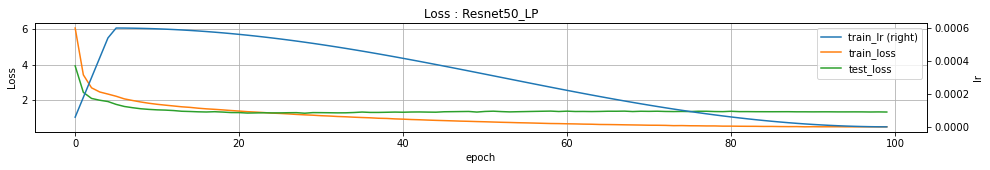

<Figure size 432x288 with 0 Axes>

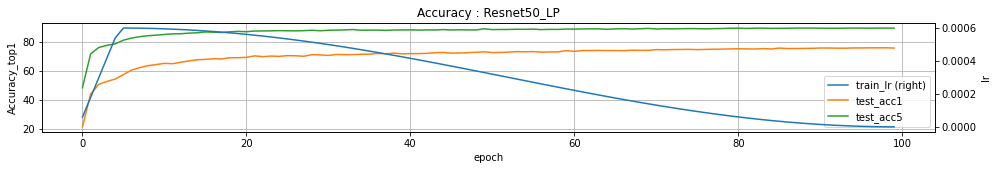

In [73]:
file = 'log_resnet50.txt'
loss_Resnet = load_loss(file)
# loss_log_resnet
plot_loss(loss_Resnet, figsize=(16,2), title='Resnet50_LP')

#### Compare models

In [77]:
# Compare models
def get_lastlog(loss_log):
    start = loss_log.query('epoch==0').index[-1]
    return loss_log.loc[start:].set_index('epoch')

logs_  =  [loss_Ebird_LP, loss_Ebird_LP_2fc, loss_Img_LP , loss_Resnet]
loss_logs = [get_lastlog(loss_log).test_acc1 for loss_log in logs_ ]

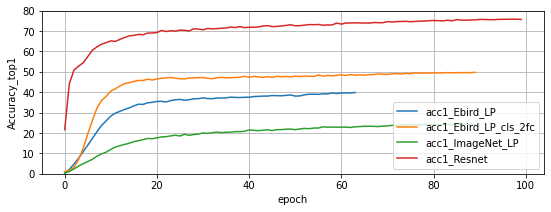

In [78]:
compare = (pd.concat(loss_logs, axis=1).
           set_axis(['acc1_Ebird_LP', 'acc1_Ebird_LP_cls_2fc', 'acc1_ImageNet_LP', 'acc1_Resnet'], axis='columns')
          )
compare.plot(grid=True, figsize=(9,3), ylim=(0,80), ylabel="Accuracy_top1");

In [67]:
loss_log_resnet

,train_lr,train_loss,test_loss,test_acc1,test_acc5,epoch,n_parameters
0,0.000205,7.037141,6.667678,0.827058,3.294782,0.0,26552846
1,0.000615,6.371525,6.003023,2.649274,9.373319,1.0,26552846
2,0.001025,5.676866,5.145388,8.196611,22.001076,2.0,26552846
3,0.001435,4.919317,4.465654,15.626681,35.307961,3.0,26552846
4,0.001845,4.256224,3.801523,23.271920,46.624529,4.0,26552846
...,...,...,...,...,...,...,...
100,0.000004,0.465693,1.316380,75.759819,89.362563,95.0,26552846
101,0.000003,0.467175,1.315012,75.827059,89.322218,96.0,26552846
102,0.000002,0.467096,1.308992,75.840507,89.382734,97.0,26552846
103,0.000001,0.466786,1.314048,75.853955,89.402907,98.0,26552846


---

### Finetune

<Figure size 432x288 with 0 Axes>

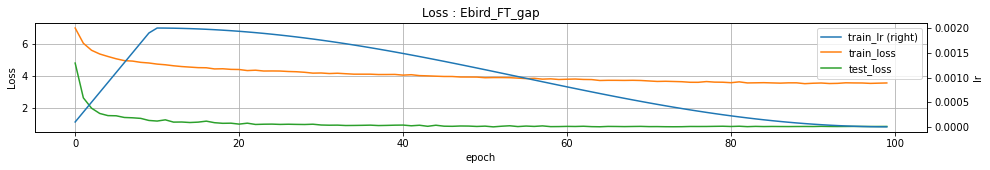

<Figure size 432x288 with 0 Axes>

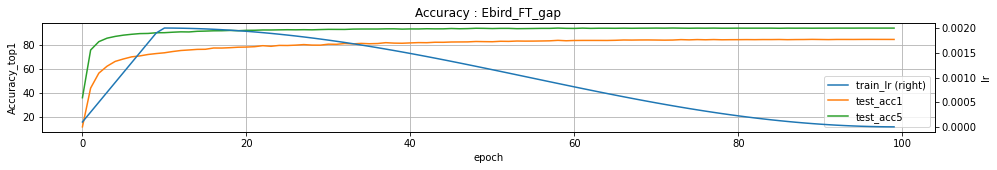

In [46]:
file = 'log_Ebird_FT_gap.txt'
loss_Ebird_FT_gap = load_loss(file)
plot_loss(loss_Ebird_FT_gap, figsize=(16,2), title='Ebird_FT_gap')

<Figure size 432x288 with 0 Axes>

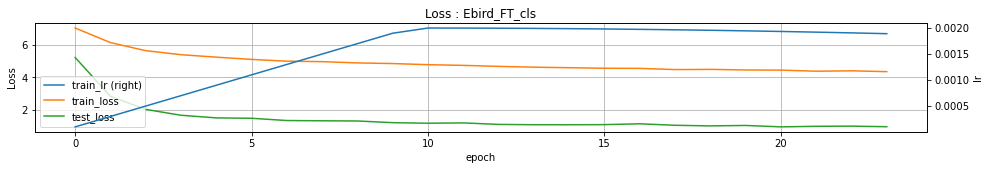

<Figure size 432x288 with 0 Axes>

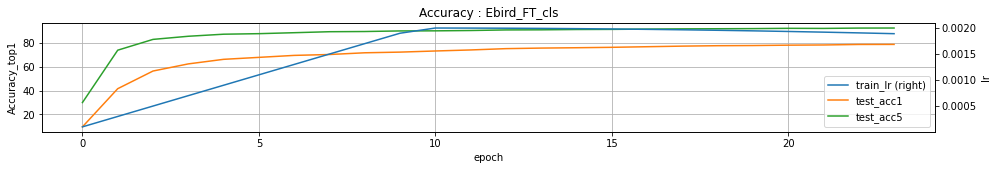

In [47]:
file = 'log_Ebird_FT_cls.txt'
loss_Ebird_FT_cls = load_loss(file)
plot_loss(loss_Ebird_FT_cls, figsize=(16,2), title='Ebird_FT_cls')

- Compare Method

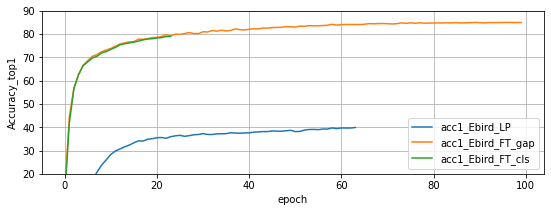

In [53]:
logs_  =  [loss_Ebird_LP, loss_Ebird_FT_gap, loss_Ebird_FT_cls]
loss_logs = [get_lastlog(loss_log).test_acc1 for loss_log in logs_ ]

compare = (pd.concat(loss_logs, axis=1).
           set_axis(['acc1_Ebird_LP', 'acc1_Ebird_FT_gap', 'acc1_Ebird_FT_cls'], axis='columns')
          )
(compare
 # .iloc[-20:,:]
 .plot(grid=True, figsize=(9,3),
       ylim=(20,90),
       ylabel="Accuracy_top1"
      ));